<a href="https://colab.research.google.com/github/Ansalnakhan/projectansalna/blob/main/ansalnaSOHandRUL06final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1458]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1459]:
import pandas as pd

In [1460]:
data=pd.read_csv("/content/B0006.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1461]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


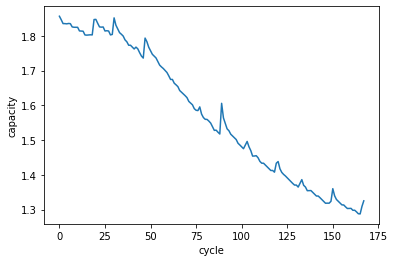

In [1462]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.ylabel('capacity')
plt.xlabel('cycle')
plt.show()

In [1463]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1464]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

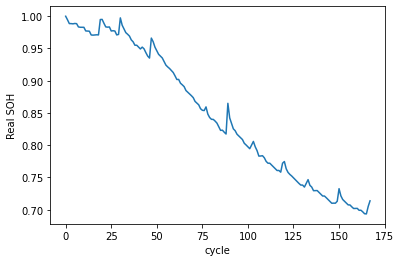

In [1465]:
plt.plot(range(len(soh)),soh)
plt.ylabel('Real SOH')
plt.xlabel('cycle')
plt.show()

In [1466]:
capacity=np.asarray(capacity)

In [1467]:
type(capacity)

numpy.ndarray

In [1468]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1469]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1470]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.5810
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0855
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0310
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0012


In [1471]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1472]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1473]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


4.8223576726905736e-05

In [1474]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.007


In [1475]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00541252]
R2_score:  0.9359255876517163


Text(0.5, 0, 'cycle')

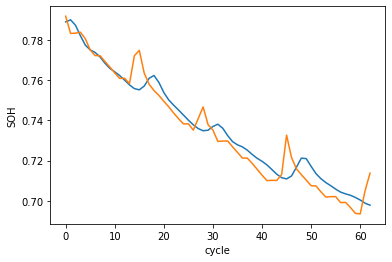

In [1476]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('SOH')
plt.xlabel('cycle')

In [1477]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1478]:
preds

array([[0.95612556],
       [0.9543552 ],
       [0.95394456],
       [0.95372635],
       [0.95270634],
       [0.95090824],
       [0.9495354 ],
       [0.94876444],
       [0.94758284],
       [0.94567925],
       [0.9439711 ],
       [0.9423198 ],
       [0.940309  ],
       [0.9389314 ],
       [0.938618  ],
       [0.93995756],
       [0.94475883],
       [0.9522638 ],
       [0.95630664],
       [0.9547925 ],
       [0.9515162 ],
       [0.9494417 ],
       [0.94786036],
       [0.9459096 ],
       [0.94422495],
       [0.9426064 ],
       [0.9420337 ],
       [0.9454019 ],
       [0.9510121 ],
       [0.9517872 ],
       [0.94766957],
       [0.9430697 ],
       [0.93967974],
       [0.9364746 ],
       [0.9328596 ],
       [0.9292854 ],
       [0.9263247 ],
       [0.92419696],
       [0.92249036],
       [0.9212971 ],
       [0.9205277 ],
       [0.91866666],
       [0.9150856 ],
       [0.91280895],
       [0.91611093],
       [0.9235974 ],
       [0.9266953 ],
       [0.923

Text(0.5, 0, 'cycle')

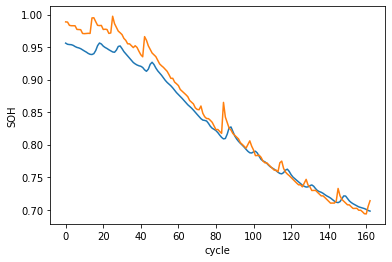

In [1479]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('SOH')
plt.xlabel('cycle')

Predicting Capacity

In [1480]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1481]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.9656
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2093
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1451
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1629
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0546
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0576
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0100


In [1482]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1483]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 10ms/step


0.00023138507387470423

In [1484]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.015


In [1485]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01357371]
R2_score:  0.9107976016004546


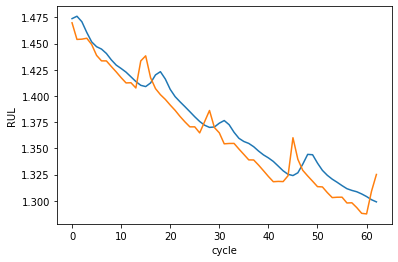

In [1486]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()


In [1487]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [1488]:
preds

array([[1.7945436],
       [1.791153 ],
       [1.790469 ],
       [1.7900902],
       [1.7881988],
       [1.7846435],
       [1.7819206],
       [1.780563 ],
       [1.778364 ],
       [1.7746102],
       [1.7712716],
       [1.7682658],
       [1.7643003],
       [1.7615529],
       [1.7610631],
       [1.7634747],
       [1.7724458],
       [1.7873315],
       [1.7956003],
       [1.7921876],
       [1.785691 ],
       [1.7817636],
       [1.7788982],
       [1.7750467],
       [1.7717538],
       [1.7688248],
       [1.7674   ],
       [1.7736063],
       [1.785154 ],
       [1.7869198],
       [1.7783103],
       [1.7695447],
       [1.763074 ],
       [1.7570171],
       [1.7500347],
       [1.7431307],
       [1.7374299],
       [1.7333622],
       [1.7301515],
       [1.7277452],
       [1.7263904],
       [1.7229685],
       [1.7159592],
       [1.7112418],
       [1.7172378],
       [1.7324109],
       [1.7389387],
       [1.7315456],
       [1.7211393],
       [1.7128416],


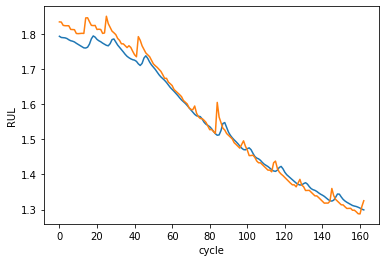

In [1489]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()